# Compare pseudobulks generate with Scaden and SimBu simulator

QC metrics: Pearson correlation, unsupervised learning

In [1]:
# Import packages

import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import seaborn as sns
import umap
import matplotlib.pyplot as plt

## 1.1 Load data

In [ ]:
scaden_sim = pd.read_csv('Path/to/scaden/pseudobulks_all_genes.csv', index_col = 0)
simbu_sim = pd.read_csv('Path/to/SimBu/Pseudobulk_counts_cpm.csv', index_col = 0)
props = pd.read_csv('Path/to/scaden/cell_type_proprotions.csv', index_col = 0)

In [3]:
scaden_sim

,MIR1302-2HG,FAM138A,OR4F5,AL627309.1,AL627309.3,AL627309.2,AL627309.4,AL732372.1,OR4F29,AC114498.1,...,AC007325.2,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,AC213203.1,FAM231C
Sample_1,0.0,0.0,0.0,0.370606,0.110511,0.0,0.127872,0.0,0.0,0.0,...,0.0,0.0,0.593364,0.0,0.984596,0.000000,0.457881,4.829695,0.0,0.0
Sample_2,0.0,0.0,0.0,0.712745,0.114787,0.0,0.095963,0.0,0.0,0.0,...,0.0,0.0,0.736858,0.0,2.387050,0.000000,0.000000,5.151184,0.0,0.0
Sample_3,0.0,0.0,0.0,0.094767,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.502463,0.0,1.552100,0.000000,0.000000,4.763111,0.0,0.0
Sample_4,0.0,0.0,0.0,0.181507,0.113450,0.0,0.314874,0.0,0.0,0.0,...,0.0,0.0,0.955879,0.0,3.332111,0.096092,0.568417,5.468141,0.0,0.0
Sample_5,0.0,0.0,0.0,0.667383,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,1.738111,0.0,1.610475,1.080704,1.436441,5.671488,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_4996,0.0,0.0,0.0,0.118903,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.936557,0.0,2.663581,0.000000,0.453806,3.953459,0.0,0.0
Sample_4997,0.0,0.0,0.0,0.333447,0.000000,0.0,0.147849,0.0,0.0,0.0,...,0.0,0.0,1.383900,0.0,1.235414,0.268113,0.248774,4.897303,0.0,0.0
Sample_4998,0.0,0.0,0.0,0.232474,0.000000,0.0,0.106206,0.0,0.0,0.0,...,0.0,0.0,1.561484,0.0,2.168203,0.000000,0.000000,4.473345,0.0,0.0
Sample_4999,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.759304,0.0,1.106401,0.000000,0.000000,5.440742,0.0,0.0


In [4]:
simbu_sim

,OR4F5,AL627309.1,AL627309.3,AL627309.4,AL669831.2,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.7,...,AC007325.1,AC007325.4,AC007325.2,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,FAM231C
custom_sample1,0.0,0.000000,0.000000,0.163660,0.099780,8.711838,0.000000,2.596957,2.019361,0.0,...,0.0,0.465367,0.0,1.284496,0.0,1.442526,0.000000,0.425373,5.188903,0.0
custom_sample2,0.0,0.184925,0.000000,0.162402,0.000000,6.590872,0.056287,2.695470,1.264278,0.0,...,0.0,1.397537,0.0,1.052462,0.0,2.573749,0.000000,0.000000,5.652859,0.0
custom_sample3,0.0,0.315182,0.000000,0.000000,0.000000,7.641985,0.041571,2.828153,0.930387,0.0,...,0.0,0.840060,0.0,0.774918,0.0,0.955169,0.000000,0.120758,4.246535,0.0
custom_sample4,0.0,0.541012,0.000000,0.000000,0.000000,8.630444,0.000000,3.393205,2.356295,0.0,...,0.0,1.399480,0.0,1.845916,0.0,3.022844,0.095804,0.539089,5.251889,0.0
custom_sample5,0.0,0.425550,0.234137,0.000000,0.000000,8.210455,0.140766,3.355921,2.004164,0.0,...,0.0,1.045345,0.0,1.347112,0.0,1.613941,0.114364,0.421398,7.873895,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
custom_sample4996,0.0,0.607859,0.000000,0.000000,0.150617,9.703276,0.038482,5.172569,1.134135,0.0,...,0.0,1.518119,0.0,1.383370,0.0,3.310197,0.000000,0.529817,4.815675,0.0
custom_sample4997,0.0,0.000000,0.000000,0.000000,0.000000,6.963689,0.140907,3.269562,1.377838,0.0,...,0.0,0.811047,0.0,1.215111,0.0,2.466429,0.114100,0.373499,5.135589,0.0
custom_sample4998,0.0,0.560628,0.000000,0.000000,0.000000,7.547874,0.087859,3.333674,1.718951,0.0,...,0.0,1.233451,0.0,0.845520,0.0,2.616630,0.000000,0.000000,5.014159,0.0
custom_sample4999,0.0,0.568575,0.000000,0.000000,0.000000,5.820337,0.000000,2.841114,1.656792,0.0,...,0.0,0.836029,0.0,1.917313,0.0,2.601889,0.000000,0.000000,4.157759,0.0


In [5]:
props

,B cells,Monocytes,NK cells,T cells CD4 conv,T cells CD8,mDC
Sample_1,0.381764,0.191383,0.013026,0.369739,0.025050,0.019038
Sample_2,0.063190,0.456369,0.028084,0.138415,0.287864,0.026078
Sample_3,0.037111,0.112337,0.023069,0.612839,0.203611,0.011033
Sample_4,0.275827,0.395186,0.017051,0.276830,0.020060,0.015045
Sample_5,0.554664,0.130391,0.002006,0.169509,0.116349,0.027081
...,...,...,...,...,...,...
Sample_4996,0.061122,0.108216,0.242485,0.128257,0.025050,0.434870
Sample_4997,0.353059,0.157472,0.033099,0.263791,0.117352,0.075226
Sample_4998,0.028084,0.298897,0.186560,0.191575,0.165496,0.129388
Sample_4999,0.091274,0.148445,0.070211,0.227683,0.408225,0.054162


Scaden-based pseudobulks subset to simbu genes:

In [6]:
scaden_sim_reduced = scaden_sim[simbu_sim.columns.tolist()]
scaden_sim_reduced

,OR4F5,AL627309.1,AL627309.3,AL627309.4,AL669831.2,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.7,...,AC007325.1,AC007325.4,AC007325.2,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,FAM231C
Sample_1,0.0,0.370606,0.110511,0.127872,0.0,7.415947,0.115385,3.495553,1.964149,0.0,...,0.0,0.910253,0.0,0.593364,0.0,0.984596,0.000000,0.457881,4.829695,0.0
Sample_2,0.0,0.712745,0.114787,0.095963,0.0,8.289736,0.044897,4.723462,2.206447,0.0,...,0.0,1.867092,0.0,0.736858,0.0,2.387050,0.000000,0.000000,5.151184,0.0
Sample_3,0.0,0.094767,0.000000,0.000000,0.0,4.779330,0.000000,2.720801,1.399353,0.0,...,0.0,1.012640,0.0,0.502463,0.0,1.552100,0.000000,0.000000,4.763111,0.0
Sample_4,0.0,0.181507,0.113450,0.314874,0.0,6.688718,0.072258,4.119207,2.100340,0.0,...,0.0,0.817438,0.0,0.955879,0.0,3.332111,0.096092,0.568417,5.468141,0.0
Sample_5,0.0,0.667383,0.000000,0.000000,0.0,8.573359,0.000000,3.119849,2.042023,0.0,...,0.0,1.696065,0.0,1.738111,0.0,1.610475,1.080704,1.436441,5.671488,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sample_4996,0.0,0.118903,0.000000,0.000000,0.0,9.905708,0.101151,3.092281,1.569958,0.0,...,0.0,1.133847,0.0,0.936557,0.0,2.663581,0.000000,0.453806,3.953459,0.0
Sample_4997,0.0,0.333447,0.000000,0.147849,0.0,9.724789,0.000000,2.314342,2.010708,0.0,...,0.0,0.611013,0.0,1.383900,0.0,1.235414,0.268113,0.248774,4.897303,0.0
Sample_4998,0.0,0.232474,0.000000,0.106206,0.0,7.758388,0.000000,4.420318,1.624826,0.0,...,0.0,1.567479,0.0,1.561484,0.0,2.168203,0.000000,0.000000,4.473345,0.0
Sample_4999,0.0,0.000000,0.000000,0.000000,0.0,6.834526,0.357834,2.419930,0.977676,0.0,...,0.0,1.945167,0.0,0.759304,0.0,1.106401,0.000000,0.000000,5.440742,0.0


In [7]:
# Merge proportions with sample labels for simbu and scaden simulations
props2 = props.copy()
props['SimType'] = ['Scaden-based'] * props.shape[0]
props2.index = simbu_sim.index.tolist()
props2['SimType'] = ['SimBu-based'] * props2.shape[0]
props_merged = pd.concat([props,props2])
props_merged

,B cells,Monocytes,NK cells,T cells CD4 conv,T cells CD8,mDC,SimType
Sample_1,0.381764,0.191383,0.013026,0.369739,0.025050,0.019038,Scaden-based
Sample_2,0.063190,0.456369,0.028084,0.138415,0.287864,0.026078,Scaden-based
Sample_3,0.037111,0.112337,0.023069,0.612839,0.203611,0.011033,Scaden-based
Sample_4,0.275827,0.395186,0.017051,0.276830,0.020060,0.015045,Scaden-based
Sample_5,0.554664,0.130391,0.002006,0.169509,0.116349,0.027081,Scaden-based
...,...,...,...,...,...,...,...
custom_sample4996,0.061122,0.108216,0.242485,0.128257,0.025050,0.434870,SimBu-based
custom_sample4997,0.353059,0.157472,0.033099,0.263791,0.117352,0.075226,SimBu-based
custom_sample4998,0.028084,0.298897,0.186560,0.191575,0.165496,0.129388,SimBu-based
custom_sample4999,0.091274,0.148445,0.070211,0.227683,0.408225,0.054162,SimBu-based


In [8]:
# Merge scaden and simbu pseudobulks
pseudobulks_merged = pd.concat([scaden_sim_reduced, simbu_sim])
pseudobulks_merged

,OR4F5,AL627309.1,AL627309.3,AL627309.4,AL669831.2,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.7,...,AC007325.1,AC007325.4,AC007325.2,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1,FAM231C
Sample_1,0.0,0.370606,0.110511,0.127872,0.000000,7.415947,0.115385,3.495553,1.964149,0.0,...,0.0,0.910253,0.0,0.593364,0.0,0.984596,0.000000,0.457881,4.829695,0.0
Sample_2,0.0,0.712745,0.114787,0.095963,0.000000,8.289736,0.044897,4.723462,2.206447,0.0,...,0.0,1.867092,0.0,0.736858,0.0,2.387050,0.000000,0.000000,5.151184,0.0
Sample_3,0.0,0.094767,0.000000,0.000000,0.000000,4.779330,0.000000,2.720801,1.399353,0.0,...,0.0,1.012640,0.0,0.502463,0.0,1.552100,0.000000,0.000000,4.763111,0.0
Sample_4,0.0,0.181507,0.113450,0.314874,0.000000,6.688718,0.072258,4.119207,2.100340,0.0,...,0.0,0.817438,0.0,0.955879,0.0,3.332111,0.096092,0.568417,5.468141,0.0
Sample_5,0.0,0.667383,0.000000,0.000000,0.000000,8.573359,0.000000,3.119849,2.042023,0.0,...,0.0,1.696065,0.0,1.738111,0.0,1.610475,1.080704,1.436441,5.671488,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
custom_sample4996,0.0,0.607859,0.000000,0.000000,0.150617,9.703276,0.038482,5.172569,1.134135,0.0,...,0.0,1.518119,0.0,1.383370,0.0,3.310197,0.000000,0.529817,4.815675,0.0
custom_sample4997,0.0,0.000000,0.000000,0.000000,0.000000,6.963689,0.140907,3.269562,1.377838,0.0,...,0.0,0.811047,0.0,1.215111,0.0,2.466429,0.114100,0.373499,5.135589,0.0
custom_sample4998,0.0,0.560628,0.000000,0.000000,0.000000,7.547874,0.087859,3.333674,1.718951,0.0,...,0.0,1.233451,0.0,0.845520,0.0,2.616630,0.000000,0.000000,5.014159,0.0
custom_sample4999,0.0,0.568575,0.000000,0.000000,0.000000,5.820337,0.000000,2.841114,1.656792,0.0,...,0.0,0.836029,0.0,1.917313,0.0,2.601889,0.000000,0.000000,4.157759,0.0


## 1.2 Using unsupervised learning techniques

In [9]:
# Create a plotting function to label samples by simulation technique

from sklearn.decomposition import PCA

# Define the function

def clusterSamples(df, metadata):
    metadata = metadata
    metadata['ID'] = metadata.index.tolist()
    metaData_final = metadata

    fig, axs = plt.subplots(2,2, figsize = (10,10))
    axs[1,1].axis('off')
    # plt.subplots_adjust(hspace=0.15)
    plt.suptitle('Analysis of pseudobulks from Scaden- and SimBu-based simulation', fontweight = 'bold', fontsize = 'x-large')
    plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.9, wspace=0.45,hspace=0.4)

    pca = PCA(n_components = 2)
    components = pca.fit_transform(df)
    pca.fit(df)

    labels = metaData_final['SimType']
    X = pd.DataFrame(pd.concat([pd.DataFrame(components, index=metaData_final['ID']), pd.DataFrame(labels, index=metaData_final['ID'])], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", "SimType"]
    sns.scatterplot(ax = axs[0,0], x = "Dim1", y = "Dim2", data = X, hue = "SimType", size = 1, legend = False)
    axs[0,0].set_title('PCA')
    axs[0,0].set_xlabel("Dim 1 (explained variance " + str(round(pca.explained_variance_ratio_[0] *100, ndigits=2)) + " %)")
    axs[0,0].set_ylabel("Dim 2 (explained variance " + str(round(pca.explained_variance_ratio_[1] *100, ndigits=2)) + " %)")


    fit = umap.UMAP()
    u = fit.fit_transform(df)

    labels = metaData_final['SimType']
    X = pd.DataFrame(pd.concat([pd.DataFrame(u, index=metaData_final['ID']), pd.DataFrame(labels, index=metaData_final['ID'])], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", "SimType"]
    sns.scatterplot(ax = axs[0,1], x = "Dim1", y = "Dim2", data = X, hue = "SimType", size = 1, legend = False)
    axs[0,1].set_title('UMAP')

    u = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 30).fit_transform(df)
    labels = metaData_final['SimType']
    X = pd.DataFrame(pd.concat([pd.DataFrame(u, index=metaData_final['ID']), pd.DataFrame(labels, index=metaData_final['ID'])], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", "SimType"]
    sns.scatterplot(ax = axs[1,0], x = "Dim1", y = "Dim2", data = X, hue = "SimType", size = 1)
    sns.move_legend(axs[1,0], "upper left", bbox_to_anchor=(1, 1), ncol = 4, title = 'Sample annotation')
    axs[1,0].set_title('t-SNE')

/home/schauerm/miniconda3/envs/Jupyter_new/lib/python3.11/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


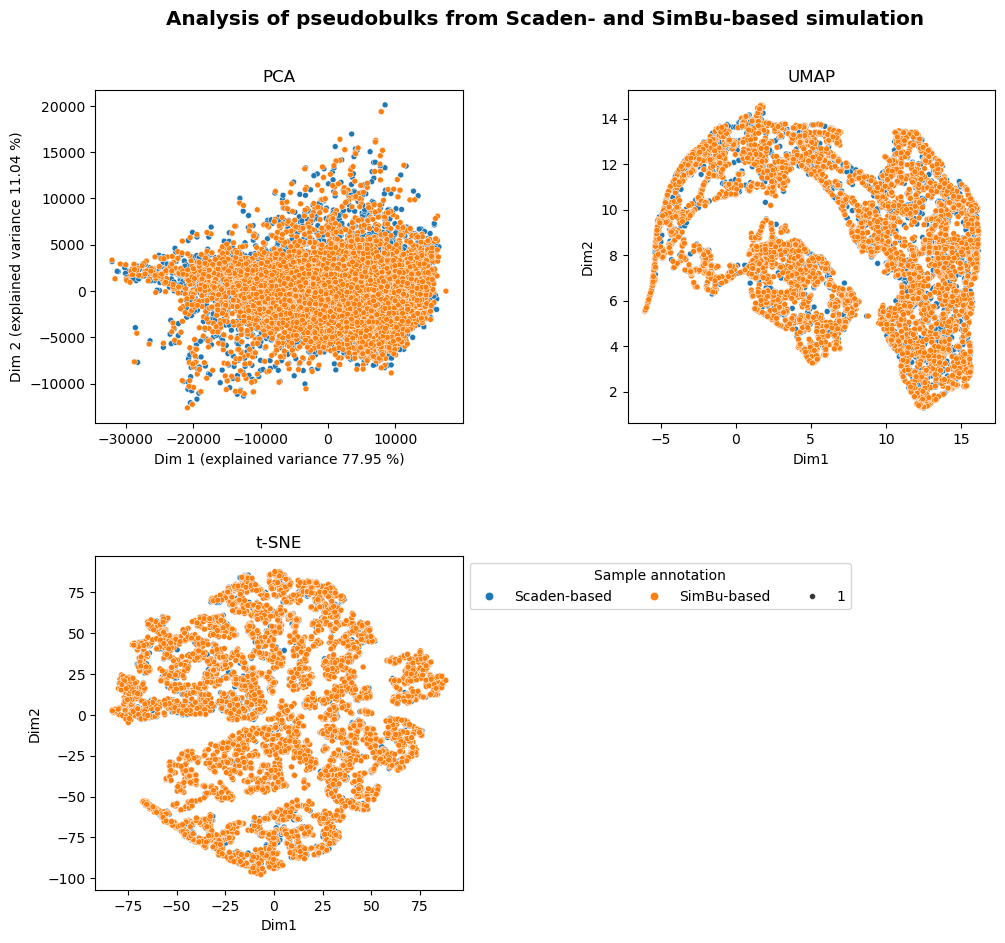

In [10]:
clusterSamples(pseudobulks_merged, props_merged)

In [11]:
# Function for scattering data and coloring
# Define the function

def clusterCellTypeAbundance(df, metadata, cellType):
    metadata = metadata
    metadata['ID'] = metadata.index.tolist()
    metaData_final = metadata

    fig, axs = plt.subplots(2,2, figsize = (10,10))
    axs[1,1].axis('off')
    # plt.subplots_adjust(hspace=0.15)
    plt.suptitle('Analysis of pseudobulks from Scaden- and SimBu-based simulation for abundance of ' + str(cellType), fontweight = 'bold', fontsize = 'x-large')
    plt.subplots_adjust(left=0.05, bottom=0.1, right=0.95, top=0.9, wspace=0.45,hspace=0.4)

    pca = PCA(n_components = 2)
    components = pca.fit_transform(df)
    pca.fit(df)

    labels = metaData_final[cellType]
    X = pd.DataFrame(pd.concat([pd.DataFrame(components, index=metaData_final['ID']), pd.DataFrame(labels, index=metaData_final['ID'])], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", cellType]
    sns.scatterplot(ax = axs[0,0], x = "Dim1", y = "Dim2", data = X, hue = cellType, legend = False, size = 1)
    axs[0,0].set_title('PCA')
    axs[0,0].set_xlabel("Dim 1 (explained variance " + str(round(pca.explained_variance_ratio_[0] *100, ndigits=2)) + " %)")
    axs[0,0].set_ylabel("Dim 2 (explained variance " + str(round(pca.explained_variance_ratio_[1] *100, ndigits=2)) + " %)")


    fit = umap.UMAP()
    u = fit.fit_transform(df)

    labels = metaData_final[cellType]
    X = pd.DataFrame(pd.concat([pd.DataFrame(u, index=metaData_final['ID']), pd.DataFrame(labels, index=metaData_final['ID'])], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", cellType]
    sns.scatterplot(ax = axs[0,1], x = "Dim1", y = "Dim2", data = X, hue = cellType, legend = False, size = 1)
    axs[0,1].set_title('UMAP')

    u = TSNE(n_components = 2, learning_rate = 'auto', init = 'random', perplexity = 30).fit_transform(df)
    labels = metaData_final[cellType]
    X = pd.DataFrame(pd.concat([pd.DataFrame(u, index=metaData_final['ID']), pd.DataFrame(labels, index=metaData_final['ID'])], axis = 1, ignore_index=False))
    X.columns = ["Dim1", "Dim2", cellType]
    sns.scatterplot(ax = axs[1,0], x = "Dim1", y = "Dim2", data = X, hue = cellType, size = 1)
    sns.move_legend(axs[1,0], "upper left", bbox_to_anchor=(1, 1), ncol = 4, title = 'Sample annotation')
    axs[1,0].set_title('t-SNE')

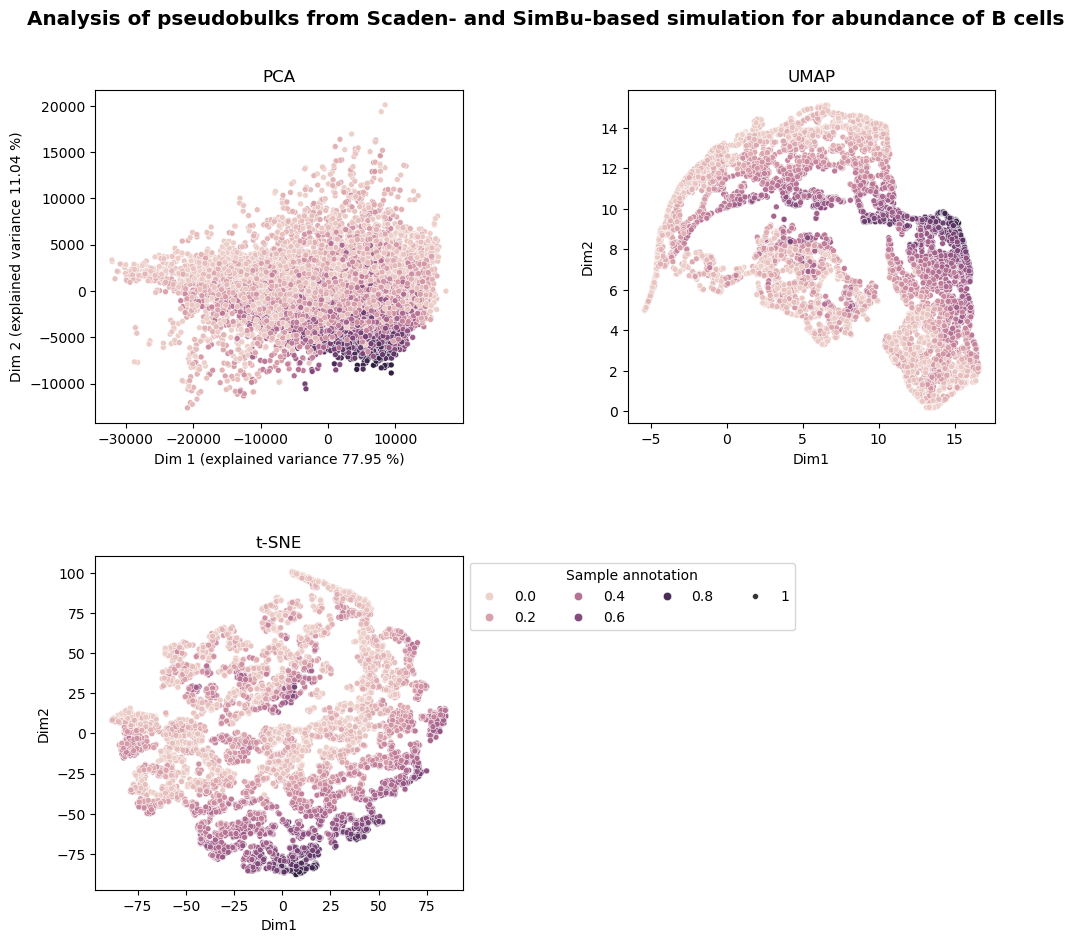

In [12]:
clusterCellTypeAbundance(pseudobulks_merged, props_merged, "B cells")

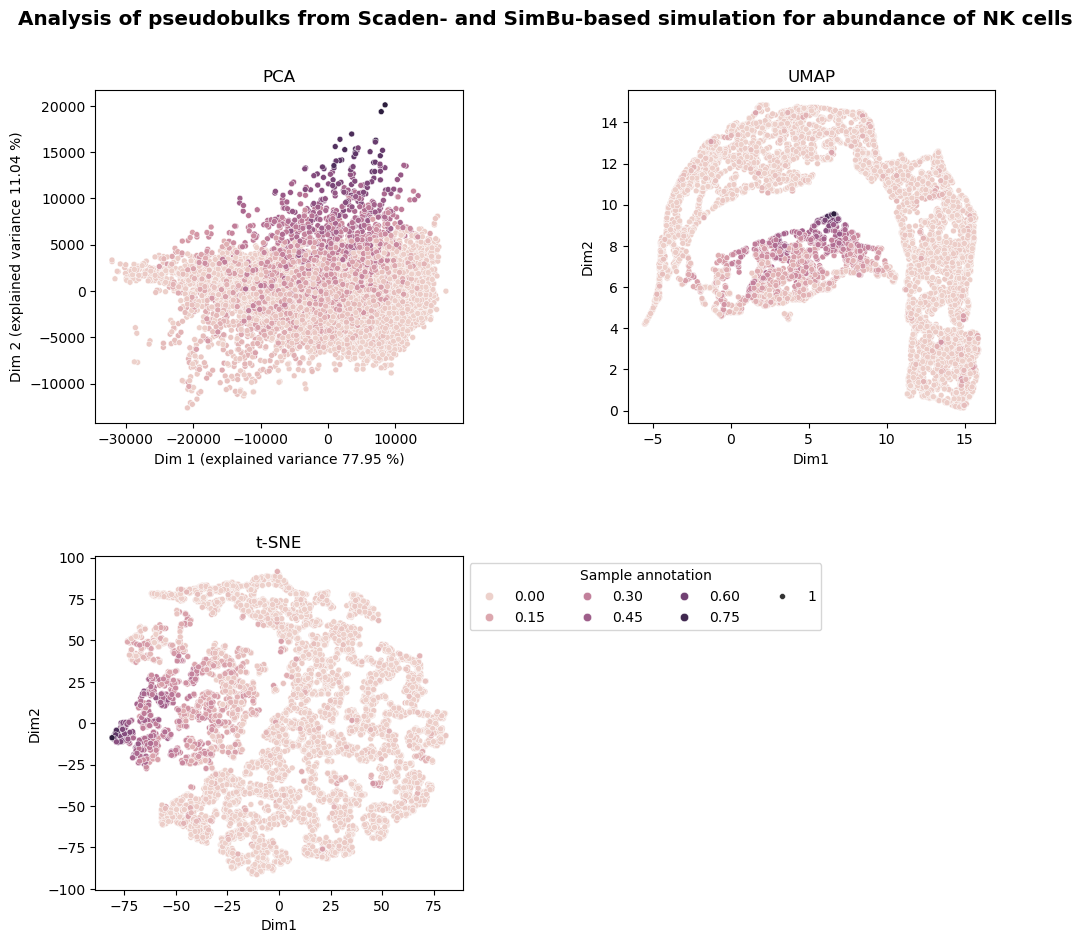

In [13]:
clusterCellTypeAbundance(pseudobulks_merged, props_merged, "NK cells")

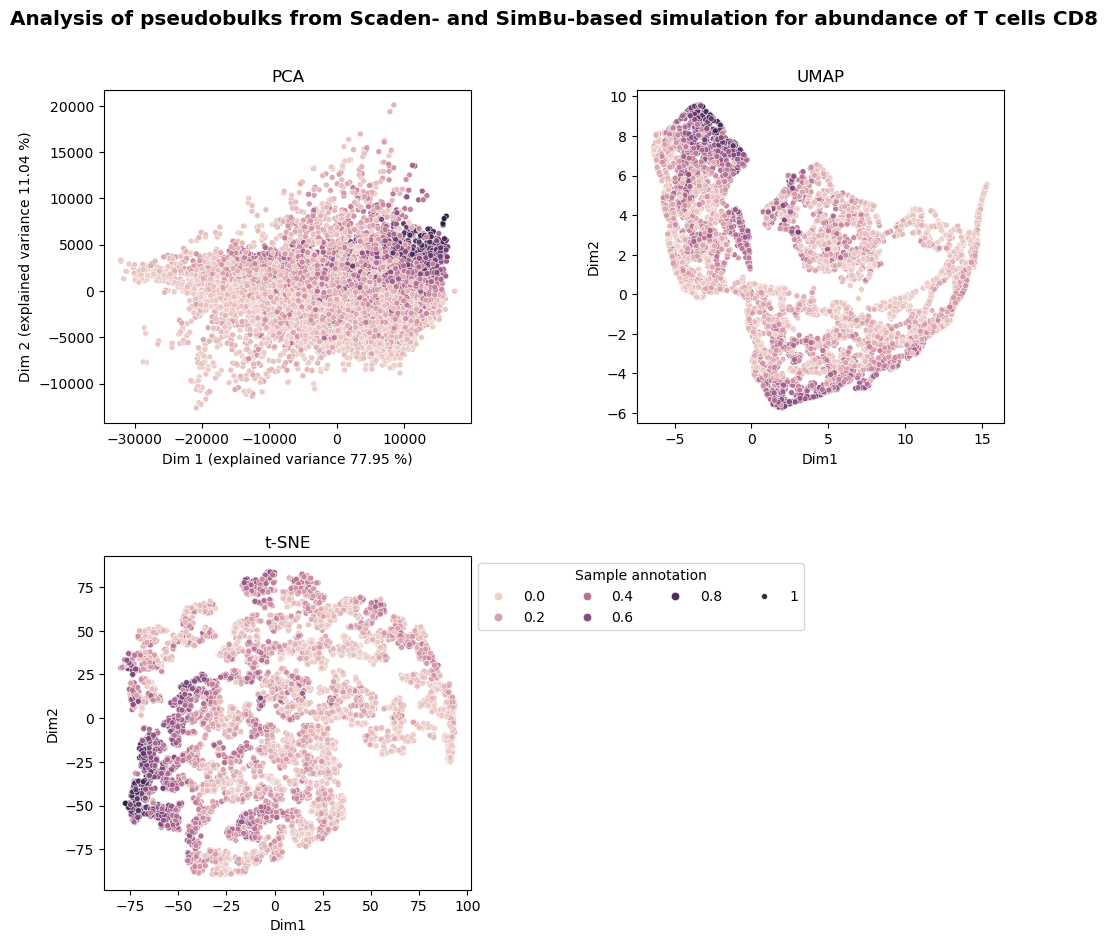

In [14]:
clusterCellTypeAbundance(pseudobulks_merged, props_merged, "T cells CD8")

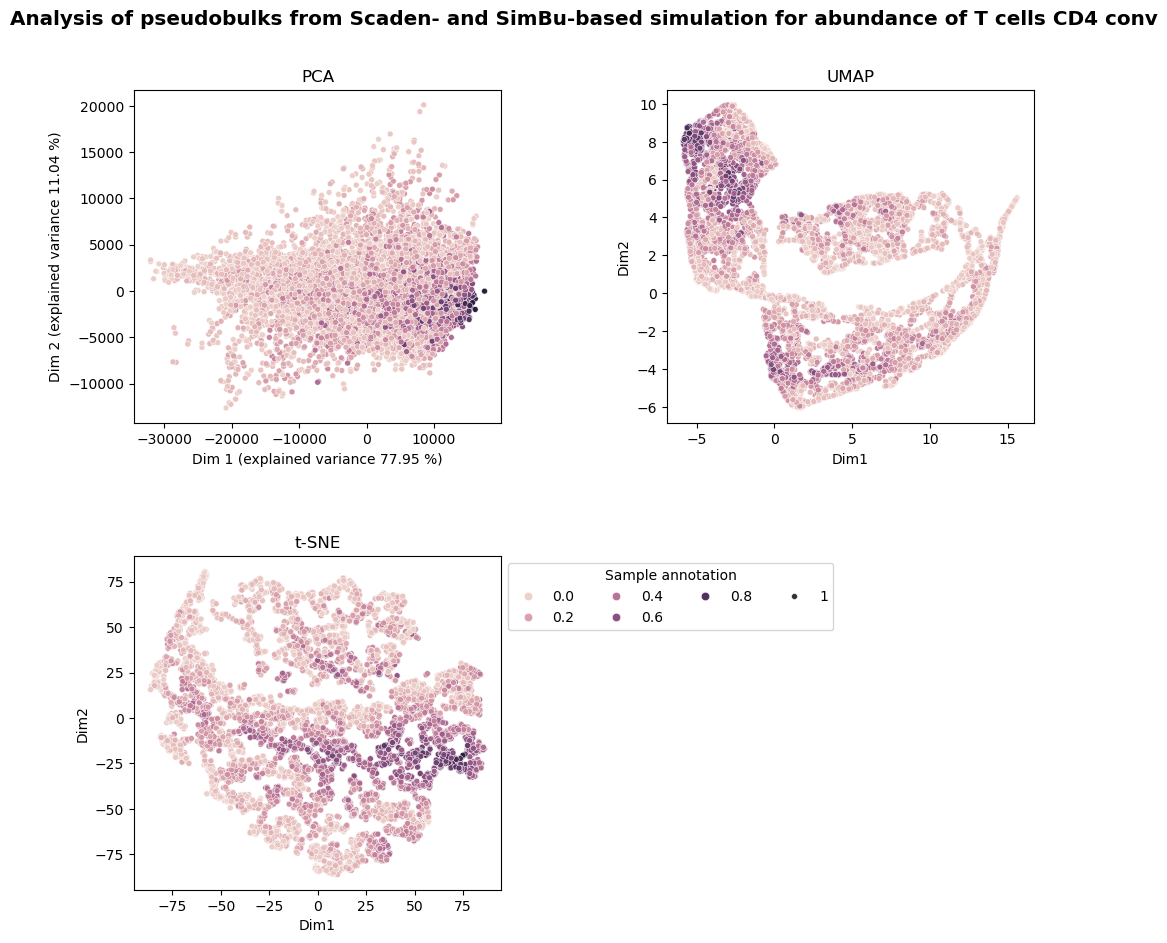

In [15]:
clusterCellTypeAbundance(pseudobulks_merged, props_merged, "T cells CD4 conv")

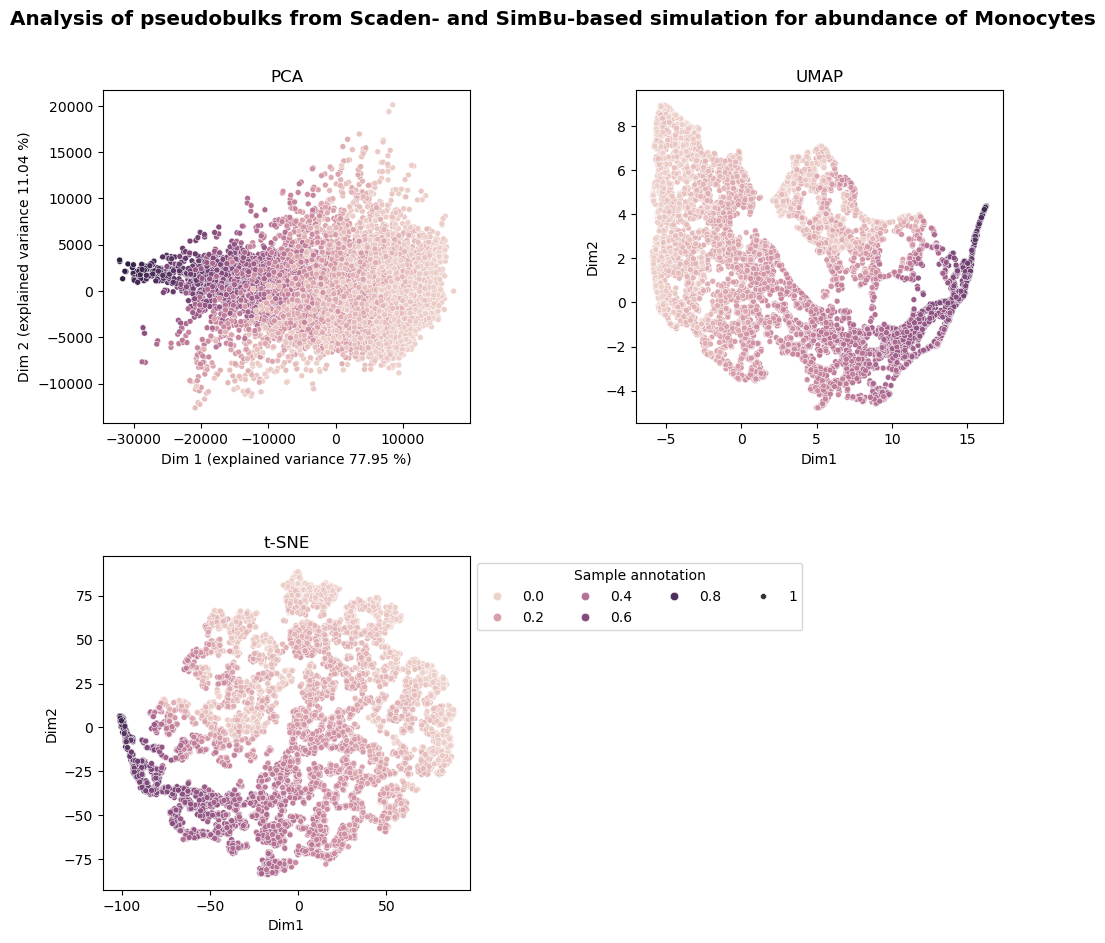

In [16]:
clusterCellTypeAbundance(pseudobulks_merged, props_merged, "Monocytes")

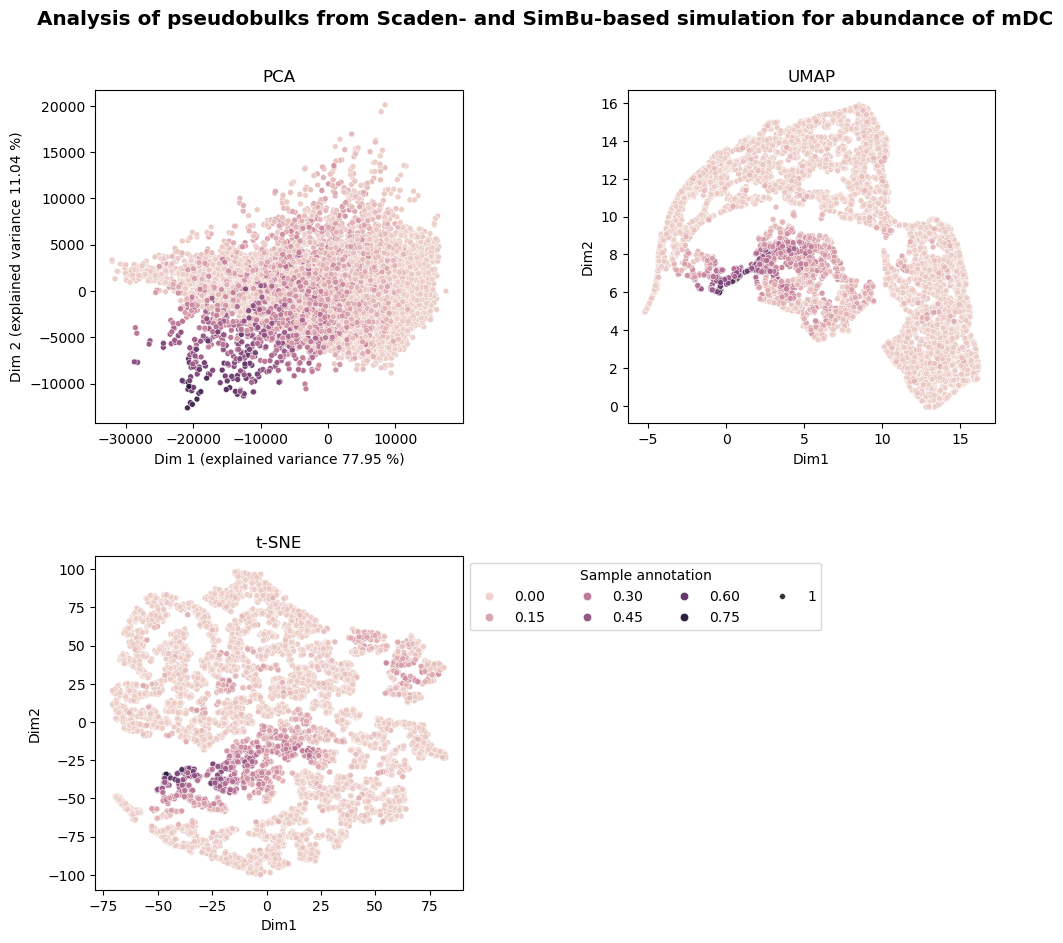

In [52]:
clusterCellTypeAbundance(pseudobulks_merged, props_merged, "mDC")

## 1.3 Correlation analysis

In [17]:
# Define QC functions

from sklearn.metrics import r2_score
import numpy as np

# SVT R2 score (via square root, which is a variance stabilizing transformation)
def r2_score_svt(x_data, y_data):
    x_svt = x_data.transform(lambda x: np.sqrt(x+0.1)) 
    y_svt = y_data.transform(lambda x: np.sqrt(x+0.1))
    r2_svt = r2_score(x_svt,y_svt)
    return r2_svt


# Concordance correlation coefficient
def ccc(x_data,y_data):
    sxy = np.sum((x_data - x_data.mean())*(y_data - y_data.mean()))/x_data.shape[0]
    rhoc = 2*sxy / (np.var(x_data) + np.var(y_data) + (x_data.mean() - y_data.mean())**2)
    return rhoc


# Pearson Correlation Coefficient
def r(x_data,y_data):
    ''' Pearson Correlation Coefficient'''
    sxy = np.sum((x_data - x_data.mean())*(y_data - y_data.mean()))/x_data.shape[0]
    rho = sxy / (np.std(x_data)*np.std(y_data))
    return rho


# RMSE
def rmse(x_data,y_data):
    MSE = np.square((x_data-y_data)).mean()
    RMSE = np.sqrt(MSE)
    return RMSE

In [45]:
# Function to loop over real and corresponding simu samples and perform QC scoring

def QCscoring(df):
    dfQC = df.copy()
    dfQC = dfQC.iloc[0:(int(dfQC.shape[0]/2)),0:4]
    dfQC.columns = ['R', 'RMSE', 'CCC', 'R_svt']
    
    for i in range(0,dfQC.shape[0]):

        dfQC.iloc[i,0] = float(r(df.iloc[i,:], df.iloc[dfQC.shape[0]+i,:]))
        dfQC.iloc[i,1] = float(rmse(df.iloc[i,:], df.iloc[dfQC.shape[0]+i,:]))
        dfQC.iloc[i,2] = float(ccc(df.iloc[i,:], df.iloc[dfQC.shape[0]+i,:]))
        dfQC.iloc[i,3] = float(r2_score_svt(df.iloc[i,:], df.iloc[dfQC.shape[0]+i,:]))
        
    return dfQC

In [46]:
dfQC = QCscoring(pseudobulks_merged)
dfQC

,R,RMSE,CCC,R_svt
Sample_1,0.999943,5.025617,0.999943,0.998412
Sample_2,0.999869,8.151744,0.999822,0.998441
Sample_3,0.999898,7.276777,0.999897,0.998175
Sample_4,0.999843,8.486409,0.999809,0.998197
Sample_5,0.999844,8.437040,0.999843,0.997695
...,...,...,...,...
Sample_4996,0.999515,14.619367,0.999332,0.998454
Sample_4997,0.999814,9.438227,0.999795,0.998218
Sample_4998,0.999836,7.898549,0.999836,0.997932
Sample_4999,0.999932,5.987983,0.999925,0.998101


## Visualization of QC metrics

In [66]:
# Define a plot to visualize QC metrics

def plotQC(df):

    fig, axs = plt.subplots(1,4, figsize = (20, 5))

    sns.boxplot(ax = axs[0], y = df["R"], fill = None)
    #sns.stripplot(y = df["R"], dodge=True, ax=axs[0], legend=False, size = 4)
    #axs[0].set(ylim=(0.999,1.0))
    axs[0].set_title('R')

    sns.boxplot(ax = axs[1], y = df["CCC"], fill = None)
    #sns.stripplot(y = df["CCC"], dodge=True, ax=axs[1], legend=False, size = 4)
    #axs[1].set(ylim=(0.999,1.0))
    axs[1].set_title('CCC')

    sns.boxplot(ax = axs[2], y = df["R_svt"], fill = None)
    #sns.stripplot(y = df["R_svt"], dodge=True, ax=axs[2], legend=False, size = 4)
    #axs[2].set(ylim=(0.999,1.0))
    axs[2].set_title('R_svt')

    sns.boxplot(ax = axs[3], y = df["RMSE"], fill = None)
    #sns.stripplot(y = df["RMSE"], dodge=True, ax=axs[3], legend=False, size = 4)
    axs[3].set(ylim=(0,25))
    axs[3].set_title('RMSE')
    

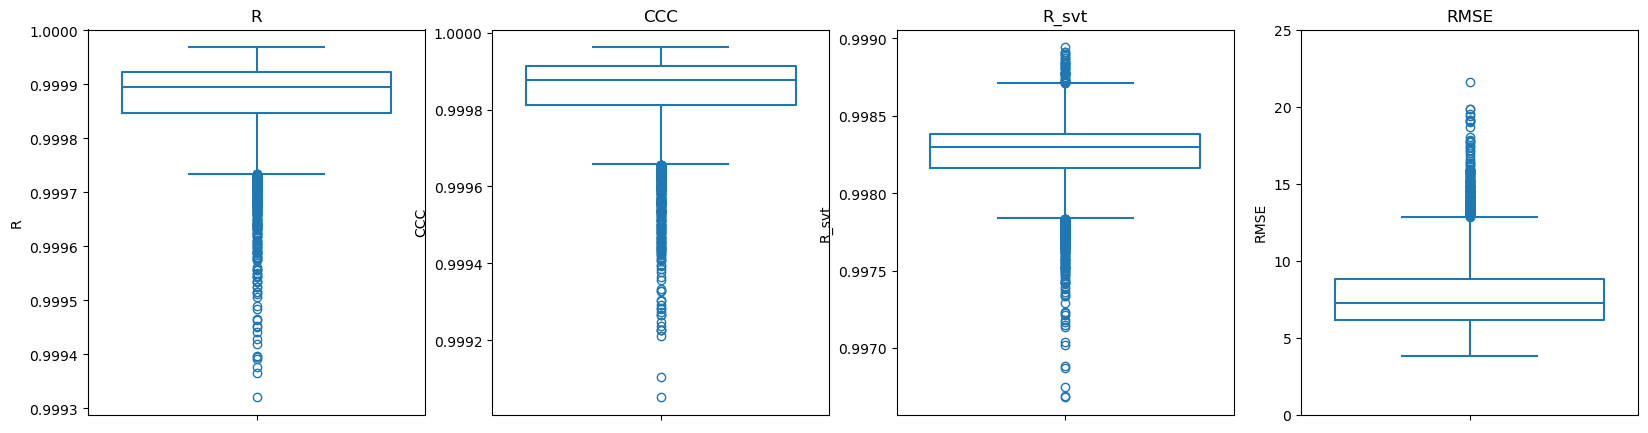

In [67]:
plotQC(dfQC)